<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/%E7%AC%94%E8%AE%B0_%E6%89%93%E5%8D%A1/%E3%80%8A%E5%A4%A7%E8%AF%AD%E8%A8%80%E6%A8%A1%E5%9E%8B%E3%80%8B_%E4%BA%BA%E5%A4%A7/%E3%80%8A%E5%A4%A7%E8%AF%AD%E8%A8%80%E6%A8%A1%E5%9E%8B%E3%80%8BTask%205%20%E9%95%BF%E4%B8%8A%E4%B8%8B%E6%96%87%20%26%26%20%E6%A8%A1%E5%9E%8B%E6%9E%B6%E6%9E%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [x] 快速过 [PPT](https://www.datawhale.cn/learn/content/107/3297)
- [x] 边看 [视频](https://www.bilibili.com/video/BV1LxRKYQEqE/?vd_source=f722c145eae91a5b6df588c0ca0f6dbb) 边整理笔记


整理自：

【教程地址】https://www.datawhale.cn/learn/summary/107
* https://github.com/datawhalechina/llmbook

## 如何让模型具备 可处理长上下文 的能力

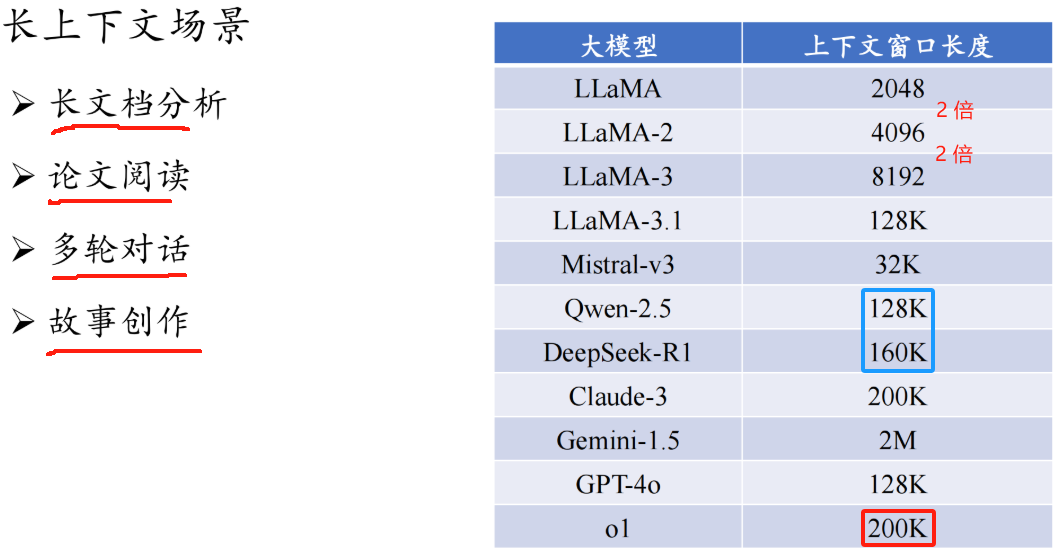

长度外推 (Length Extrapolation)
模型： AliBi、T5 Bias、xPos



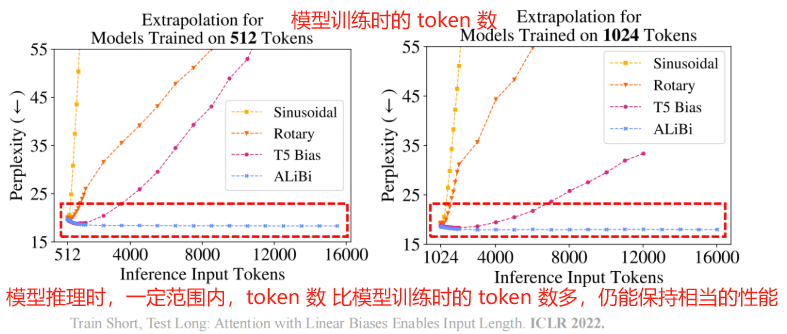

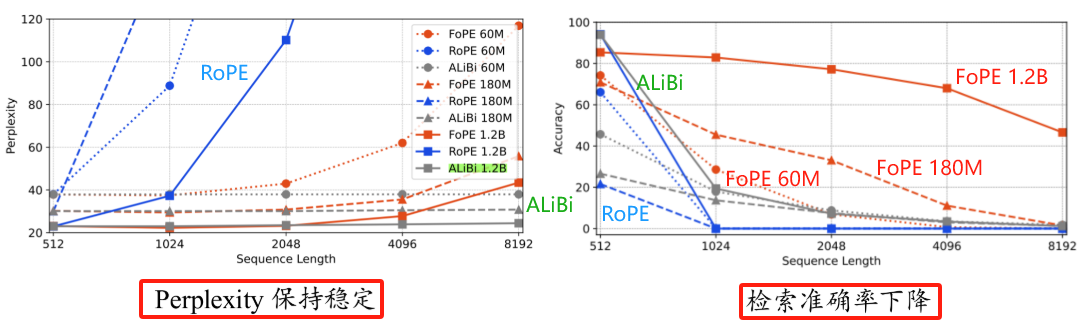

原因： 超过训练长度的**位置编码没有得到充分训练**。

### 改进思路 1： 扩展位置编码

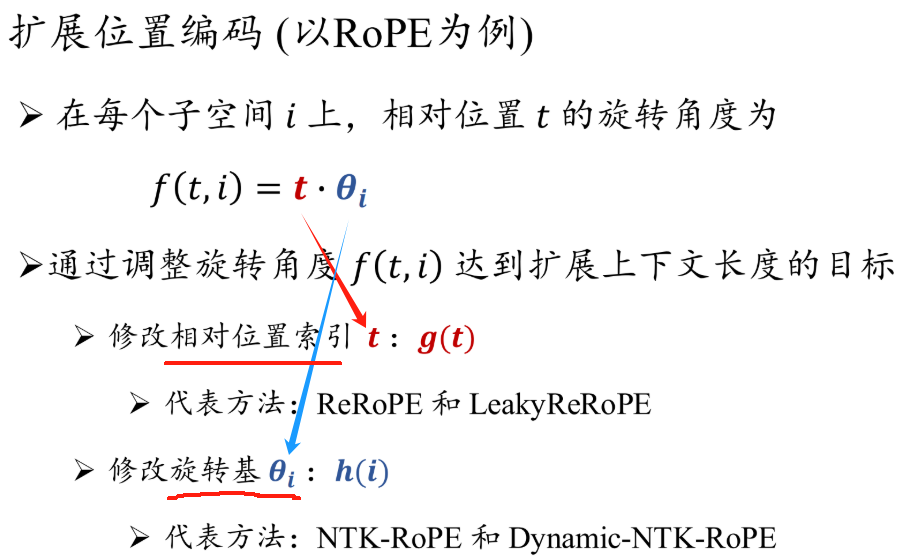

#### 改进思路 11：修改相对位置索引

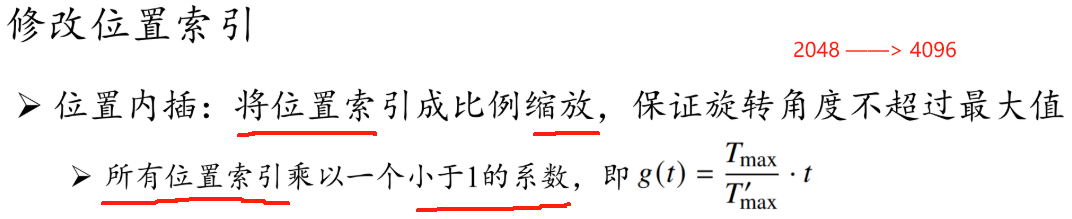

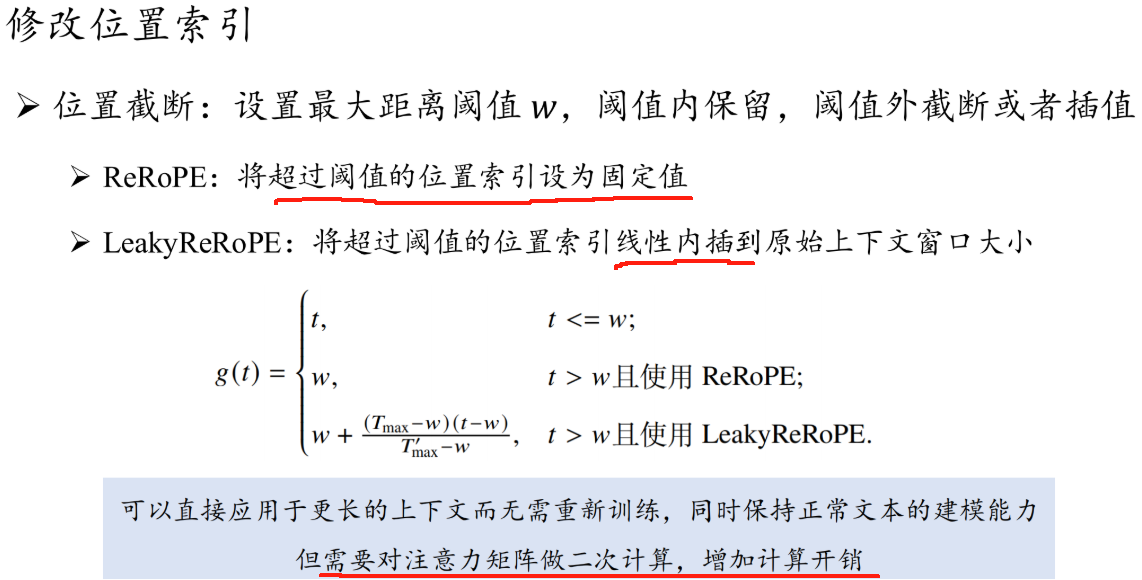

#### 改进思路 12： 修改旋转基  〔 无需额外训练〕

 **修改**旋转基的 **底数 b**

 旋转基**截断**

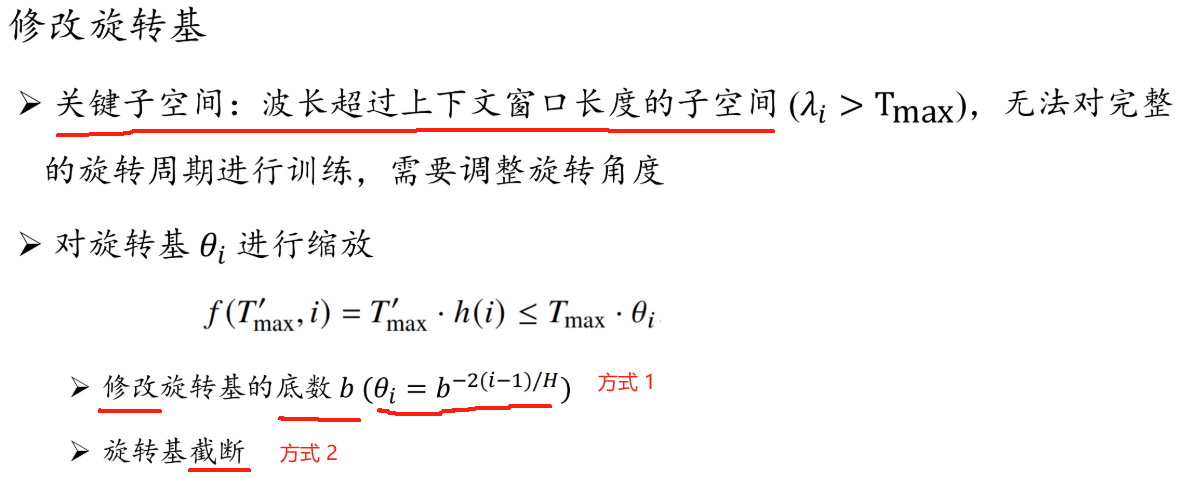

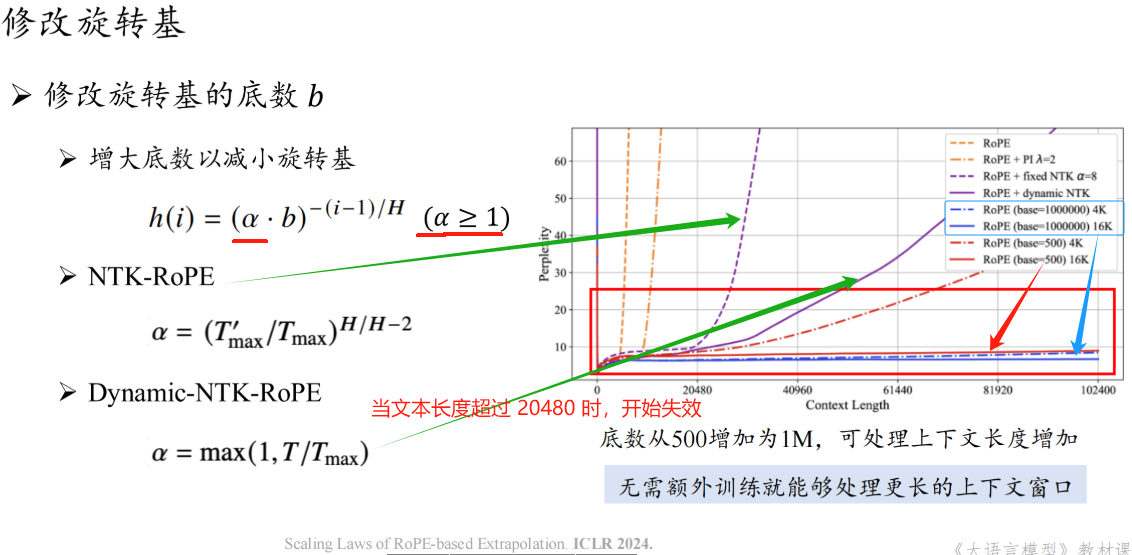

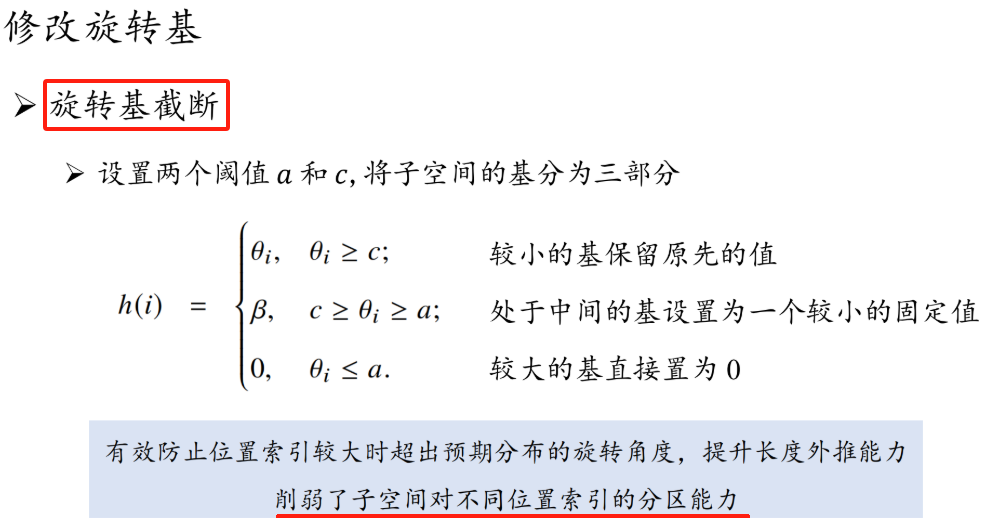

### 改进思路 2： 受限注意机制

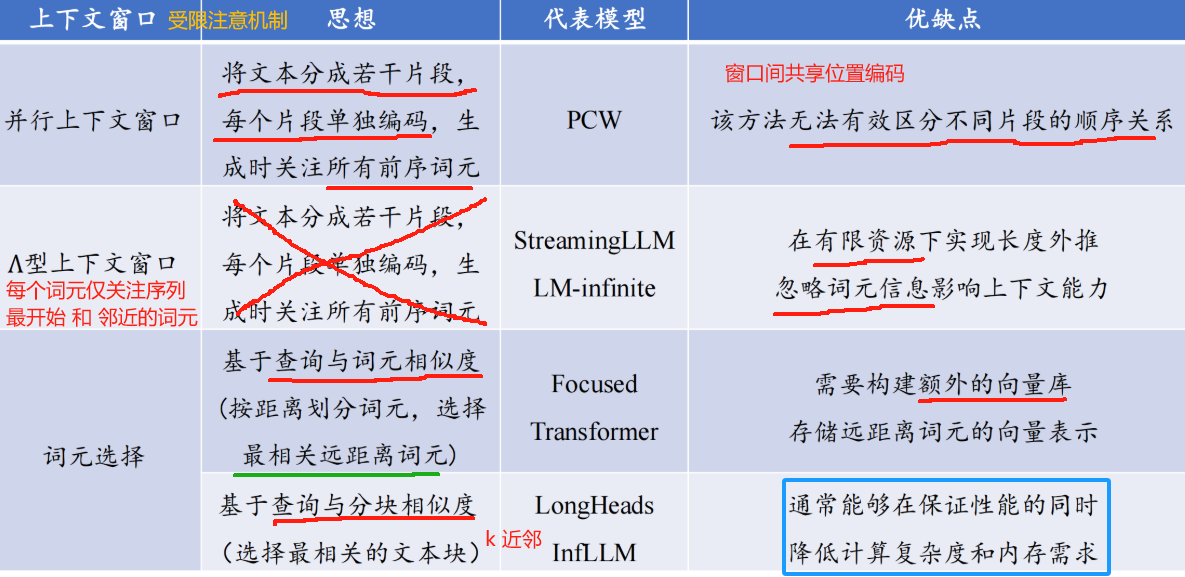

### 改进思路 3： 基于长文本数据的继续预训练

1、少量长文本数据

* **1B** tokens 的长文本数据 可将 **7B** 和 **13B** LLaMA 上下文长度扩展到 100K。




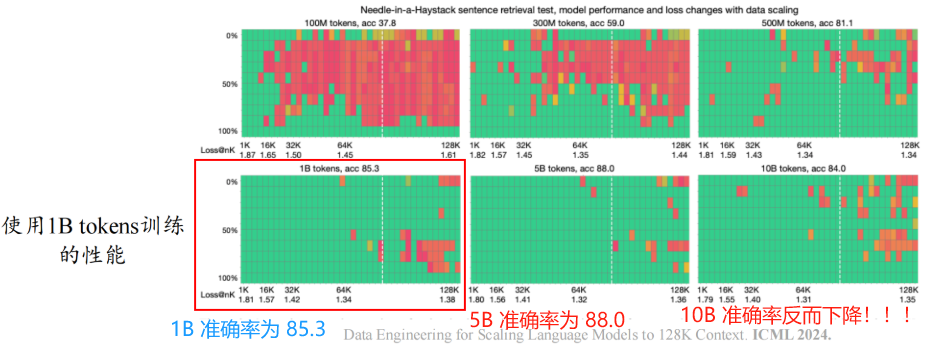

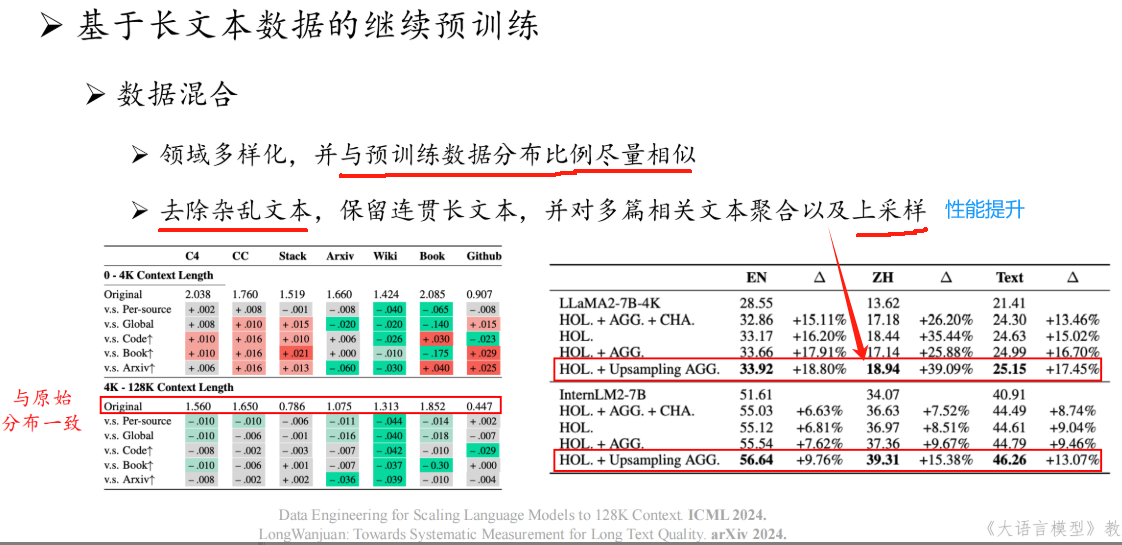

### 改进示例

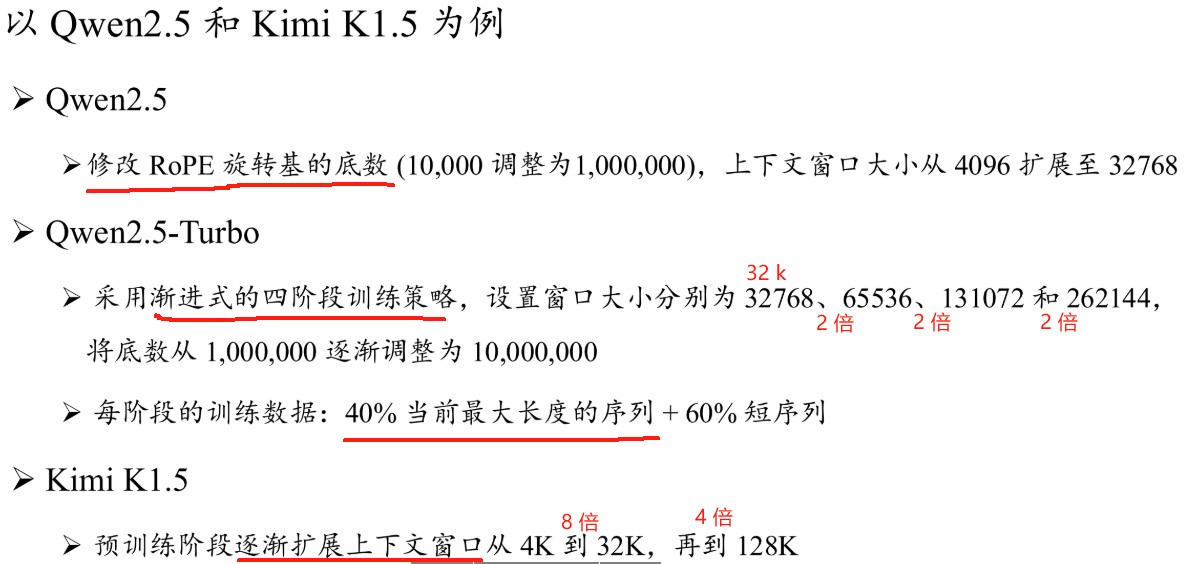

## 模型架构：参数化状态空间模型 (State Space Model, SSM)



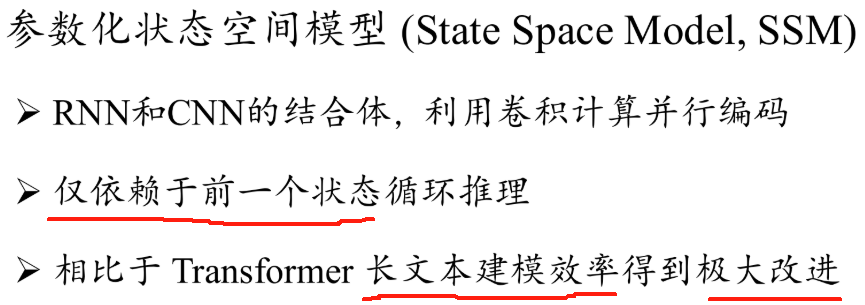

**参数化状态空间模型 概述：**

基于**当前时刻的输入** ${\boldsymbol x}_t$ 和 **前一时刻的状态** ${\boldsymbol S}_{t-1}$ 计算当前状态  ${\boldsymbol S}_{t}$

* ${\boldsymbol S}_{t}={\boldsymbol A}~ \otimes ~\color{blue}{{\boldsymbol S}_{t-1}}+{\boldsymbol B}~ \otimes ~\color{blue}{{\boldsymbol x}_t}$

再将当前时刻的状态 ${\boldsymbol S}_{t}$  映射为 输出 ${\boldsymbol y}_t$

* ${\boldsymbol y}_t={\boldsymbol C}~ \otimes ~{\boldsymbol S}_t$


递归分解当前时刻的输出，可使用**傅里叶变换**实现**高效卷积计算**。


<font color=red>全局建模能力不如 Transformer，表达能力略差。

<font color=red>实现复杂

优势：<mark>线性计算复杂度的序列建模，资源受限时可用。</mark>



**Mamba**：  引入基于当前输入的信息选择机制

* 矩阵 ${\boldsymbol A},{\boldsymbol B},{\boldsymbol C}$ 表示成输入 ${\boldsymbol x}_t$ 的非线性函数，对历史信息进行选择过滤

* 在状态计算过程中引入<font color=red>非线性变换</font>，**无法**利用 快速傅里叶变换 **实现高效卷积计算**。


**RWKV**: RNN 和 Transformer 的结合

* token 偏移 (**Token Shift**)：将**当前 token 和 前一个 token 线性插值** 代替当前 token 作为输入

* 时间混合模块 (**Time-Mixing**)：代替 Transformer 中的注意层； 门控 RNN，对 token 偏移进行**更新**。

* 通道混合模块 (**Channel-Mixing**)：代替 Transformer 中的前馈网络层； 对 token 偏移进行**映射**。

**RetNet**：多尺度保留模块 (Multi-scale Retention, MSR) 替换 多头注意模块。

**Hyena**： 长卷积模块 (Long Convolution) 替换 多头注意模块。
* 每层包含 $N$ 个滤波层，每个 相对位置索引 设置对应的滤波器组成卷积核。 ${\boldsymbol K}=\Big({\boldsymbol h}(1),\cdots,{\boldsymbol h}(T)\Big)$

* 对于每个卷积核的输出的中间表示 ${\boldsymbol z}_t$， 使用门控函数 ${\boldsymbol g}(t)$ 进行加权。




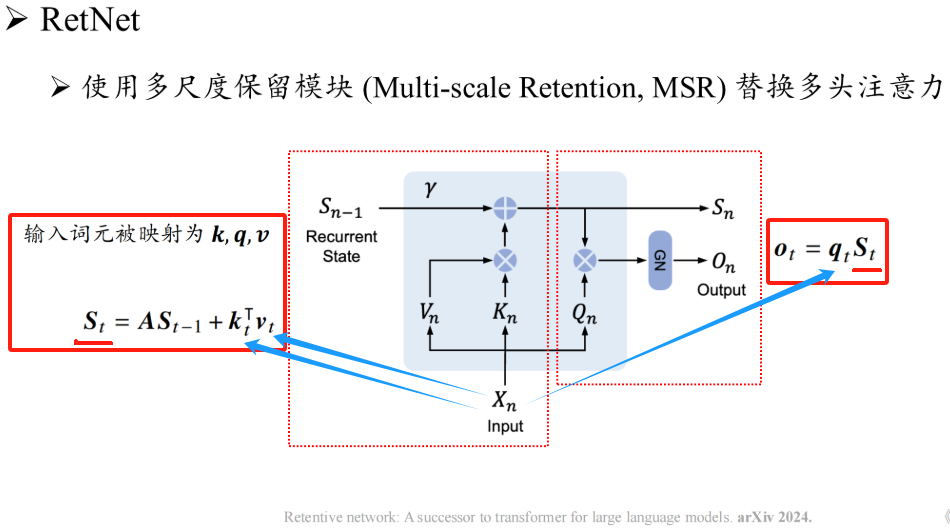

----

<font size=4>当我问 DeepSeek 和 Kimi 这个问题：<font color=blue>Transformer、Mamba、 RWKV、RetNet、Hyena 的优缺点</font>

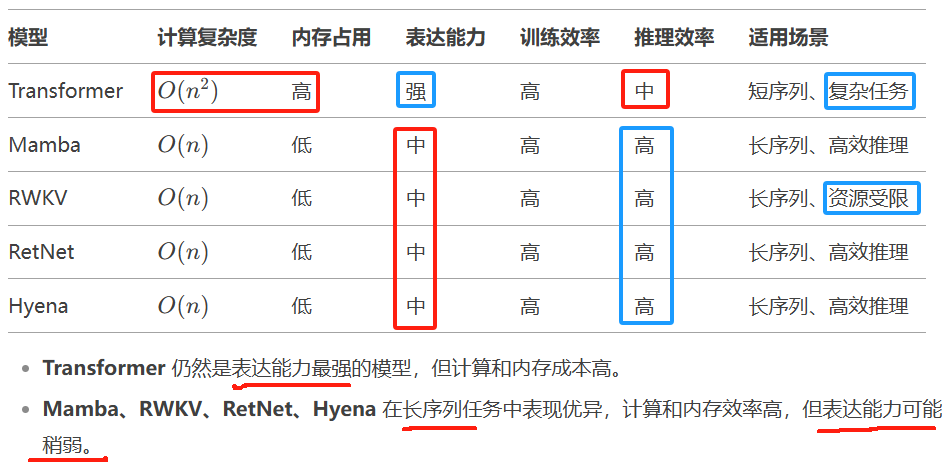

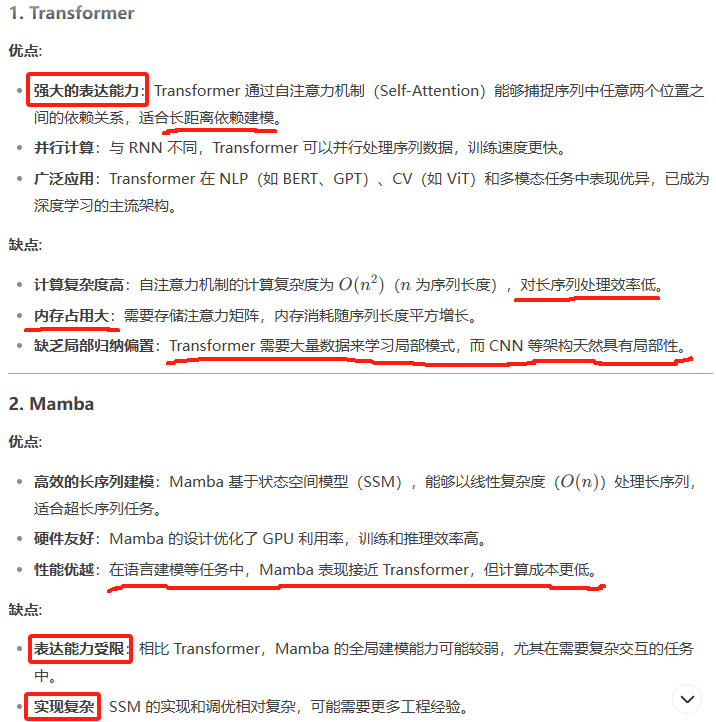

3、 RWKV（Recurrent Weighted Key-Value）

* RNN 和 Transformer 的结合：RWKV 结合了 RNN 的线性复杂度和 Transformer 的强大表达能力，适合长序列任务。
* 表达能力受限：虽然结合了 Transformer 的优点，但<font color=red>在某些复杂任务中可能仍不如纯 Transformer </font>。

* <font color=red>对提示词格式敏感

4、RetNet（Retentive Network）

* 线性复杂度：RetNet 通过引入“Retention”机制，实现了线性复杂度的序列建模，适合长序列任务。

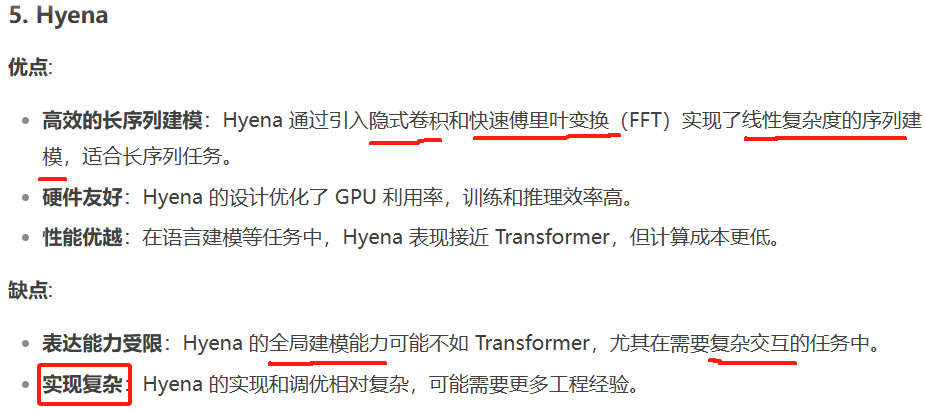

_______

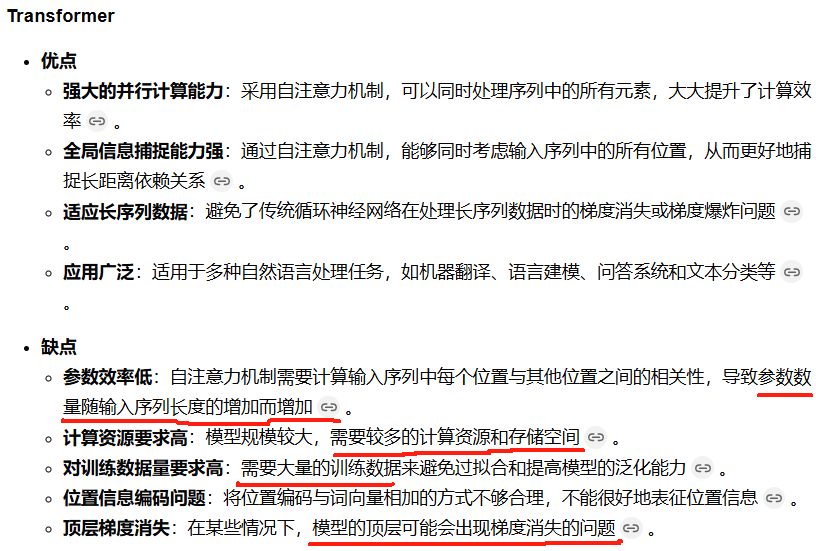

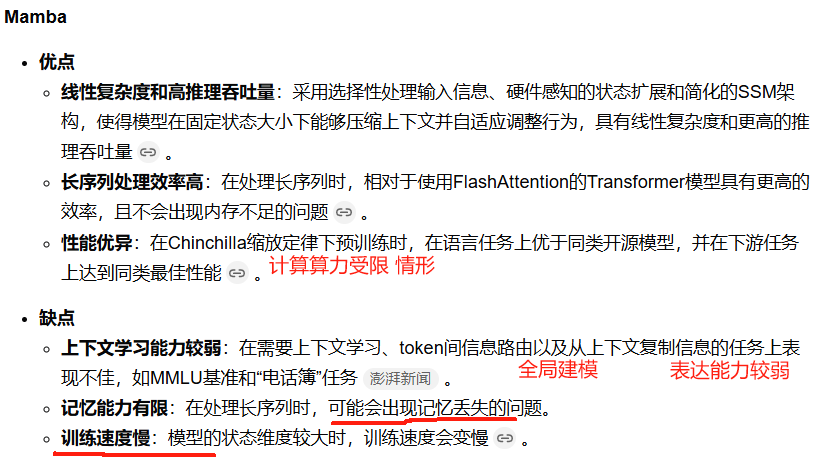

----